In [1]:
import ROOT
#import matplotlib.pyplot as plt
#import numpy as np
from math import sqrt, log

Welcome to JupyROOT 6.18/00


#### Define the Asimov Significance 
See the complete reference [G. Cowan paper](https://www.pp.rhul.ac.uk/~cowan/stat/notes/medsigNote.pdf)

In [3]:
def ams(s, b, sigma_b=None) :
    return sqrt(amssq(s,b,sigma_b))

def amssq(s, b, sigma_b=None) :
    s = float(s)
    b = float(b)
    if sigma_b: 
        sigma_b = float(sigma_b)        
    
    if s == 0:
        return float(0)
    
    if sigma_b is None or sigma_b == 0:
        return 2 * ( (s+b) * log(1+s/b) - s )
    else:
        sb2 = sigma_b*sigma_b
        b2 = b*b
        splub = s+b
        logarg1 = splub*(b+sb2) / ( b2 + splub*sb2 )
        logarg2 = 1 + sb2*s / ( b*(b+sb2) )
        log1 = log(logarg1)
        log2 = log(logarg2)
        return 2 * ( splub * log1 - (b2/sb2) * log2 )

#### Yields 
Updated yields of Z+X from Elisa, see email (new muon ID traning and WPs) <br>
Updated yields of ggH from Marko, see email (new muon ID traning and WPs) <br>
Updated yields of qqZZ from Marko, see email (new muon ID traning and WPs) <br>

In [4]:
yields_ggH = [3.43, 5.58, 8.32, 11.74, 16.33]
yields_qqZZ = [1.19, 1.99, 3.19, 5.16, 8.11]
yields_ZX = [0.042537178, 0.095374479, 0.242855215, 0.688241718, 2.577779141]

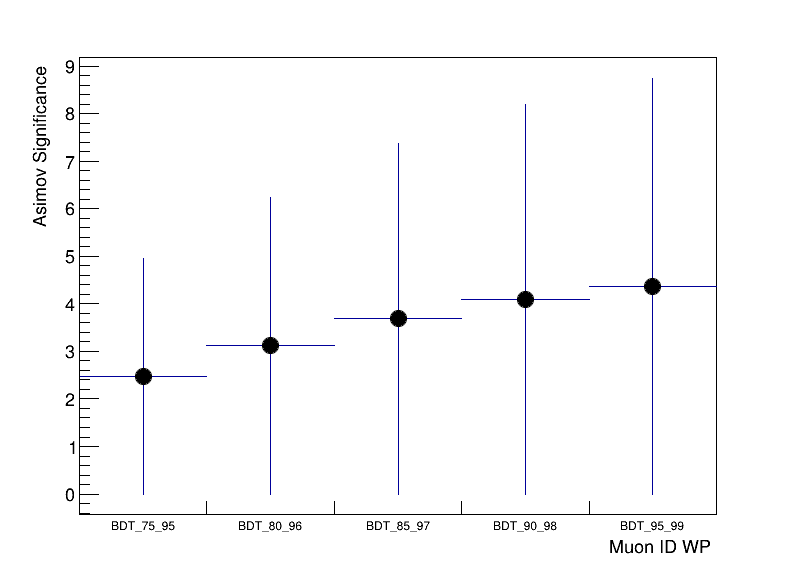

In [5]:
h_ams = ROOT.TH1F("","",5,0,5)
h_ams.SetMarkerSize(2)
h_ams.SetMarkerStyle(20)
for i in range(5) :
    h_ams.Fill(i,ams(yields_ggH[i],yields_ZX[i]+yields_qqZZ[i]))
h_ams.GetXaxis().SetBinLabel(1,"BDT_75_95")
h_ams.GetXaxis().SetBinLabel(2,"BDT_80_96")
h_ams.GetXaxis().SetBinLabel(3,"BDT_85_97")
h_ams.GetXaxis().SetBinLabel(4,"BDT_90_98")
h_ams.GetXaxis().SetBinLabel(5,"BDT_95_99")
c = ROOT.TCanvas("","",800,600)
h_ams.GetYaxis().SetTitle("Asimov Significance")
h_ams.GetXaxis().SetTitle("Muon ID WP")
h_ams.SetStats(0)
h_ams.Draw("")
c.Draw()    